<a href="https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/intro_cartpole.ipynb" 
   target="_parent">
   <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# CartPole Gym environment with TfAgents

## Install packages (gym, tfagents, tensorflow,....)

#### suppress package warnings, prepare matplotlib, if in colab: load additional packages for rendering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    
else:
    #  for local installation
    sys.path.append('..')

#### install easyagents

In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip install easyagents >/dev/null

## Dry Run (very short training)

Let's do a quick test and train for a few iterations using a default network architecture (2 layers, fully connected, 100 neurons each):

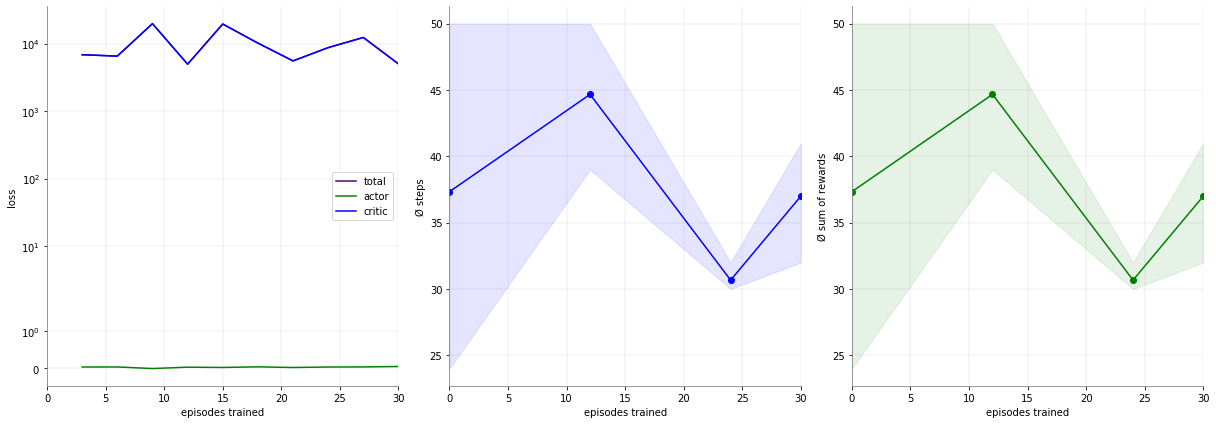

In [3]:
from easyagents.agents import PpoAgent
from easyagents.callbacks import duration

ppoAgent = PpoAgent('CartPole-v0')
ppoAgent.train([duration.Fast()])

Note that rewards and step count are equal. That's because the CartPole environment doles out 1 reward point for 
each successful step, and stops after the first failed step.

'duration.Fast()' configures the training length to 10 iterations with 10 episodes each. 
After every iteration the current policy is retrained. The resulting loss is depicted in the first plot.
Since Ppo is an actor-critic algorithm we not only plot the total loss but also the loss for the actor- and
critic-networks separately.

In the "steps" and "sum of rewards" plots we see the result of the evaluation.
The coloured area represents the max and min values encoutered for the current evaluation period.

## Train (plot state, custom network)

In [4]:
from easyagents.agents import PpoAgent
from easyagents.callbacks import plot, duration

Wall time: 56.7 s


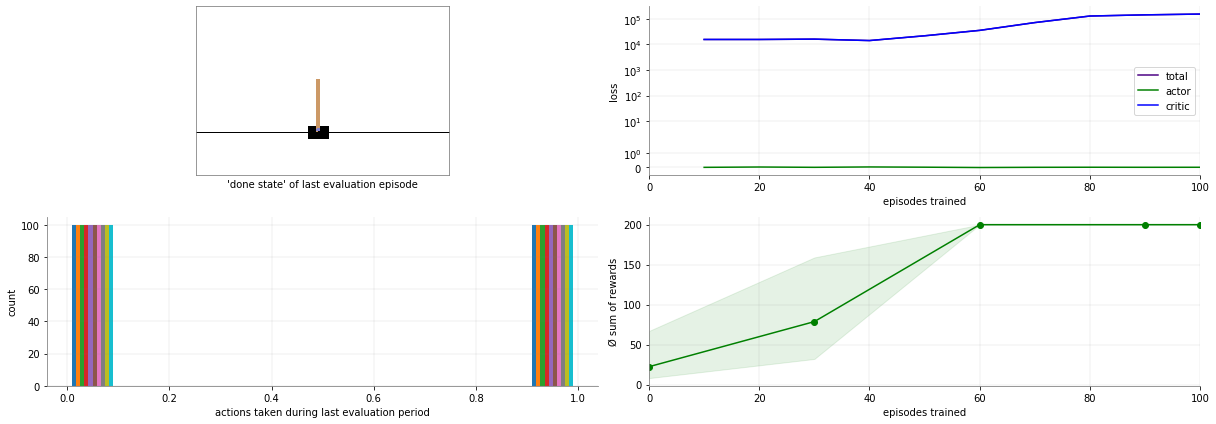

In [5]:
%%time

ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100, 50, 25))
ppoAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()],
               num_iterations=10, num_iterations_between_eval=3)


The fc_layers argument defines the policy's neural network architecture. Here we use 3 fully connected layers
with 100 neurons in the first, 50 in the second and 25 in the final layer. 
By default fc_layers=(75,75) is used.

The first argument of the train method is a list of callbacks. Through callbacks we define the plots generated during 
training, the logging behaviour or control training duration. 
By passing [plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()] we add in particular the State() plot, 
depicting the last observation state of the last evaluation episode. plot.Actions() displays a histogram of the 
actions taken for each episode played during the last evaluation period. 

Besides num_iterations there are quite a few parameters to specify the exact training duration (e.g. 
num_episodes_per_iteration, num_epochs_per_iteration, max_steps_per_episode,...).

## Switching the algorithm

Switching from Ppo to Dqn is easy, essentially just replace PpoAgent with DqnAgent (the evaluation may take a few
minuites):

In [6]:
from easyagents.agents import DqnAgent
from easyagents.callbacks import plot

Wall time: 3min 26s


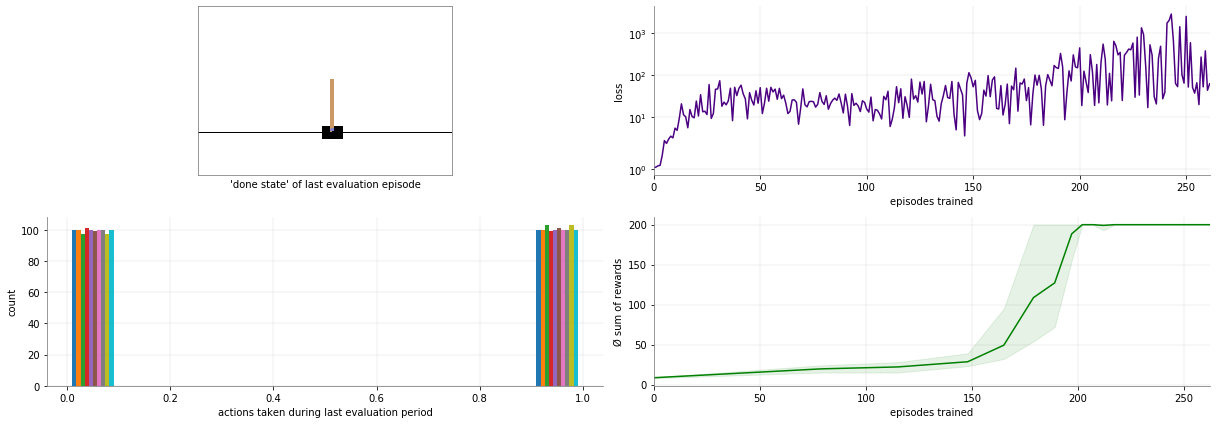

In [7]:
%%time

dqnAgent = DqnAgent('CartPole-v0', fc_layers=(100, ))
dqnAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()], 
               num_iterations=20000, num_iterations_between_eval=1000)

Since Dqn by default only takes 1 step per iteration (and thus an episode spans over several iterations) we increased
the num_iterations parameter.

## Next: custom training, creating a movie & switching backends.

* see 
  [Orso on colab](https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/intro_orso.ipynb)
  (an example of a gym environment implementation based on a routing problem)
